In [4]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from mlxtend.preprocessing import minmax_scaling

In [5]:
# Loading the train datasets
train_datax=pd.read_csv('x_train.csv')
train_datax.drop('Index',axis=1,inplace=True)
train_datax.head()

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,IDENTICAL,V,based,2,1351.0,4,2012.0,0,2,65440
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,V,NOT,based,2,1972.0,2,1980.0,0,0,14341
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,V,NOT,based,2,1630.0,4,NaN,0,0,75109
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,V,NOT,based,2,532.0,3,NaN,0,0,92004
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,IDENTICAL,V,based,2,1050.0,2,1972.0,0,4,59340


In [6]:
train_datay=pd.read_csv('y_train.csv')
train_datay.drop('Index',axis=1,inplace=True)
train_datay.head()

,login,TARGET
0,18702,0
1,3877,1
2,4942,0
3,13428,0
4,17137,0


In [7]:
train_data=pd.merge(train_datax,train_datay,on='login',how='outer')
train_data.head() 

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,18702,2014,1.000000,0,V,NOT,1,O,1,O,...,V,based,2,1351.0,4,2012.0,0,2,65440,0
1,3877,2014,1.000000,0,V,V,V,V,V,V,...,NOT,based,2,1972.0,2,1980.0,0,0,14341,1
2,4942,2013,1.000000,1,V,V,V,V,V,V,...,NOT,based,2,1630.0,4,NaN,0,0,75109,0
3,13428,2013,0.246575,0,NOT,V,V,V,V,V,...,NOT,based,2,532.0,3,NaN,0,0,92004,0
4,17137,2015,1.000000,0,V,NOT,2,O,1,O,...,V,based,2,1050.0,2,1972.0,0,4,59340,0


In [8]:
# Loading the test dataset
test_data=pd.read_csv('x_test.csv')
test_data.drop('Index',axis=1,inplace=True)
test_data.head()

,login,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,16872,2012,1.000000,1,V,NOT,1,O,1,O,...,IDENTICAL,V,effpi,2,2682.0,2,1970.0,0,4,78383
1,16852,2012,1.000000,1,V,NOT,1,O,1,O,...,IDENTICAL,V,based,2,2925.0,2,1960.0,0,6,78242
2,598,2014,1.000000,1,V,V,V,V,V,V,...,V,NOT,based,2,525.0,4,1960.0,0,0,75120
3,4516,2013,0.161644,0,NOT,V,V,V,V,V,...,V,NOT,based,2,443.0,2,1980.0,0,0,11901
4,7939,2013,1.000000,0,NOT,V,V,V,V,V,...,V,NOT,based,2,1070.0,1,NaN,0,0,42330


In [9]:
# Size of dataset
print("Total size of train data:",train_data.shape[0])
print("Total size of test data:",test_data.shape[0])
print("Total size of dataset:",train_data.shape[0]+test_data.shape[0])

Total size of train data: 10229
Total size of test data: 3412
Total size of dataset: 13641


In [10]:
# Percentage of missing data
nan_data=(train_data.isnull().sum()/train_data.shape[0])*100
nan_data

login           0.000000
ft_2_categ      0.000000
EXPO            0.000000
ft_4_categ      0.000000
ft_5_categ      0.000000
ft_6_categ      0.000000
ft_7_categ      0.000000
ft_8_categ      0.000000
ft_9_categ      0.000000
ft_10_categ     0.000000
ft_11_categ     0.000000
ft_12_categ     0.000000
ft_13_categ     0.000000
ft_14_categ     0.000000
ft_15_categ     0.000000
ft_16_categ     0.000000
ft_17_categ     0.000000
ft_18_categ     0.000000
ft_19_categ     0.000000
superficief     1.163359
ft_21_categ     0.000000
ft_22_categ    12.083293
ft_23_categ     0.000000
ft_24_categ     0.000000
Insee           1.124255
TARGET          0.000000
dtype: float64

In [11]:
nan_data[nan_data>0]

superficief     1.163359
ft_22_categ    12.083293
Insee           1.124255
dtype: float64

In [12]:
test_nan=(test_data.isnull().sum()/test_data.shape[0])*100
test_nan[['superficief','ft_22_categ','Insee']]

superficief     1.230950
ft_22_categ    11.781946
Insee           1.143025
dtype: float64

In [13]:
## superficief
train_data['superficief'].describe()

count    10110.000000
mean      1818.152918
std       2272.111284
min          1.000000
25%        500.000000
50%       1002.000000
75%       2190.000000
max      30745.000000
Name: superficief, dtype: float64

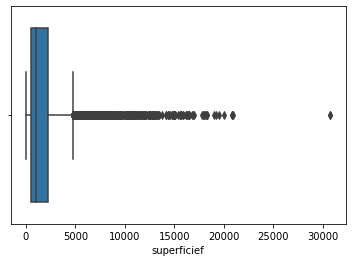

In [14]:
sns.boxplot(x=train_data['superficief'])

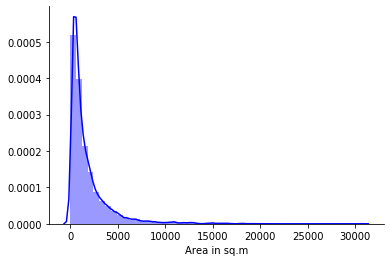

In [15]:
sns.distplot(train_data.superficief.dropna(),color='blue')
plt.xlabel('Area in sq.m')
sns.despine()

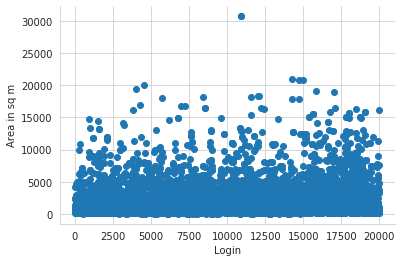

In [16]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['superficief']
plt.xlabel('Login')
plt.ylabel('Area in sq m')
plt.scatter(x,y)
sns.despine()

In [17]:
train_data[train_data.superficief>100]['superficief'].describe()

count    10021.000000
mean      1833.829358
std       2276.052092
min        104.000000
25%        518.000000
50%       1022.000000
75%       2200.000000
max      30745.000000
Name: superficief, dtype: float64

In [18]:
train_data[train_data.superficief<15000]['superficief'].describe()

count    10068.000000
mean      1752.146206
std       2021.729641
min          1.000000
25%        500.000000
50%       1000.000000
75%       2161.500000
max      14950.000000
Name: superficief, dtype: float64

In [19]:
train_data.loc[train_data.superficief>15000]=np.nan
train_data.loc[train_data.superficief<100]=np.nan
train_data.superficief.describe()

count    10005.000000
mean      1768.924138
std       2040.424244
min        100.000000
25%        510.000000
50%       1010.000000
75%       2184.000000
max      15000.000000
Name: superficief, dtype: float64

In [20]:
train_data.ft_22_categ.describe()

count    8910.000000
mean     1964.968350
std        33.640982
min      1545.000000
25%      1960.000000
50%      1969.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

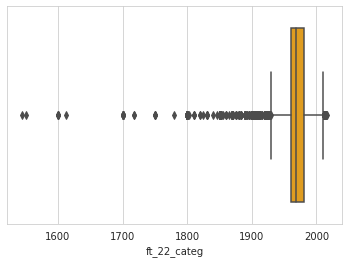

In [21]:
sns.boxplot(x=train_data['ft_22_categ'],color='orange')

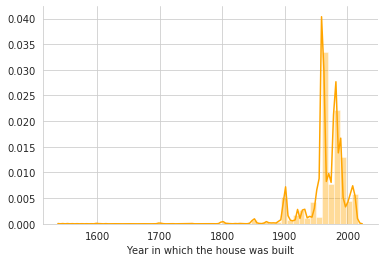

In [22]:
sns.distplot(train_data.ft_22_categ.dropna(),color='orange')
plt.xlabel('Year in which the house was built')
sns.despine()

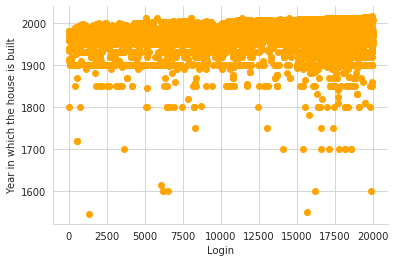

In [23]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['ft_22_categ']
plt.xlabel('Login')
plt.ylabel('Year in which the house is built')
plt.scatter(x,y,color='orange')
sns.despine()

In [24]:
train_data[train_data.ft_22_categ>1850]['ft_22_categ'].describe()

count    8781.000000
mean     1967.354629
std        26.096286
min      1854.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2016.000000
Name: ft_22_categ, dtype: float64

In [25]:
train_data[train_data.ft_22_categ<2012]['ft_22_categ'].describe()

count    8812.000000
mean     1964.438153
std        33.447434
min      1545.000000
25%      1960.000000
50%      1967.000000
75%      1980.000000
max      2011.000000
Name: ft_22_categ, dtype: float64

In [26]:
train_data.loc[train_data.ft_22_categ>2012]=np.nan
train_data.loc[train_data.ft_22_categ<1850]=np.nan
train_data.ft_22_categ.describe()

count    8808.000000
mean     1966.344005
std        27.681844
min      1850.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2012.000000
Name: ft_22_categ, dtype: float64

In [27]:
train_data.Insee.describe()

count     9915
unique    1489
top       6088
freq       235
Name: Insee, dtype: object

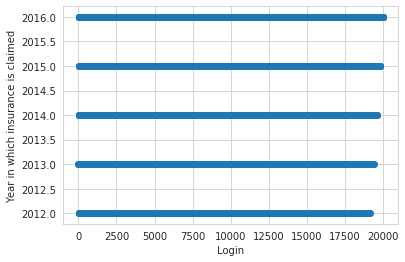

In [28]:
# Data Visualization
sns.set_style('whitegrid',{'access.edgecolor':'0'})
x=train_data['login']
y=train_data['ft_2_categ']
plt.xlabel('Login')
plt.ylabel('Year in which insurance is claimed')
plt.scatter(x,y)

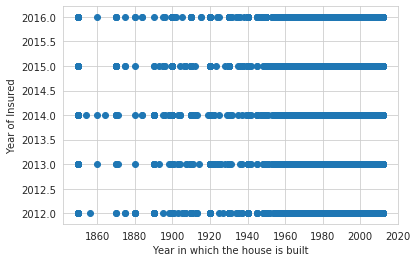

In [29]:
sns.set_style('whitegrid',{'access.edgecolor':'0'})
y=train_data['ft_2_categ']
x=train_data['ft_22_categ']
plt.xlabel('Year in which the house is built')
plt.ylabel('Year of Insured')
plt.scatter(x,y)


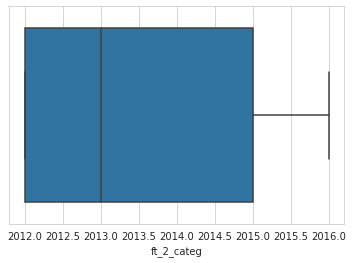

In [30]:
sns.boxplot(x=train_data['ft_2_categ'])

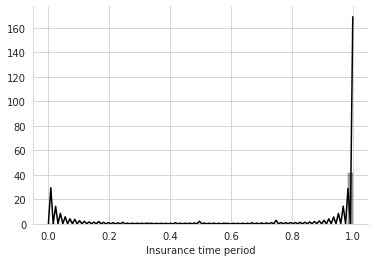

In [31]:
sns.distplot(train_data.EXPO.dropna(),color='black')
plt.xlabel('Insurance time period')
sns.despine()

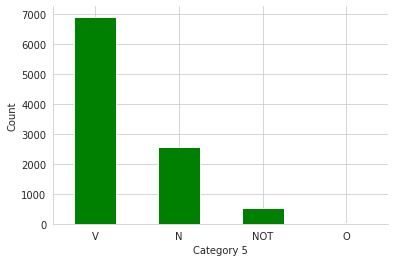

In [32]:
train_data.ft_5_categ.value_counts(dropna=True).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 5')
plt.ylabel('Count')
sns.despine()

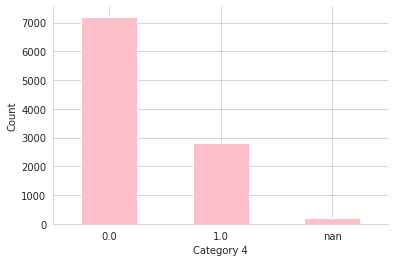

In [33]:
train_data.ft_4_categ.value_counts(dropna=False).plot(kind='bar',color='pink',rot=0)
plt.xlabel('Category 4')
plt.ylabel('Count')
sns.despine()

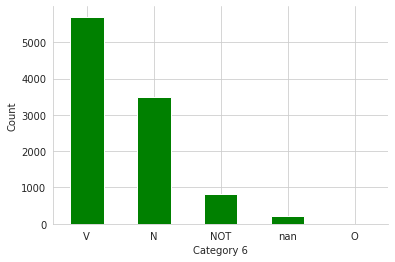

In [34]:
train_data.ft_6_categ.value_counts(dropna=False).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 6')
plt.ylabel('Count')
sns.despine()

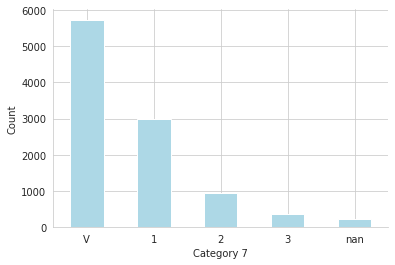

In [35]:
train_data.ft_7_categ.value_counts(dropna=False).plot(kind='bar',color='lightblue',rot=0)
plt.xlabel('Category 7')
plt.ylabel('Count')
sns.despine()

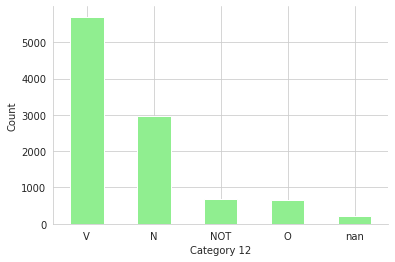

In [36]:
train_data.ft_12_categ.value_counts(dropna=False).plot(kind='bar',color='lightgreen',rot=0)
plt.xlabel('Category 12')
plt.ylabel('Count')
sns.despine()


In [37]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
login,10022.0,9914.408501,5602.210746,0.0,5150.25,9780.5,14844.75,19995.0
ft_2_categ,10022.0,2013.637797,1.379971,2012.0,2012.00,2013.0,2015.00,2016.0
EXPO,10022.0,0.914973,0.231599,0.0,1.00,1.0,1.00,1.0
ft_4_categ,10022.0,0.281181,0.449598,0.0,0.00,0.0,1.00,1.0
ft_19_categ,10022.0,1.939932,0.237624,1.0,2.00,2.0,2.00,2.0
superficief,9911.0,1774.125719,2046.238631,100.0,510.00,1013.0,2188.00,15000.0
ft_21_categ,10022.0,2.238775,0.961675,1.0,2.00,2.0,3.00,4.0
ft_22_categ,8808.0,1966.344005,27.681844,1850.0,1960.00,1970.0,1980.00,2012.0
TARGET,10022.0,0.227500,0.419239,0.0,0.00,0.0,0.00,1.0


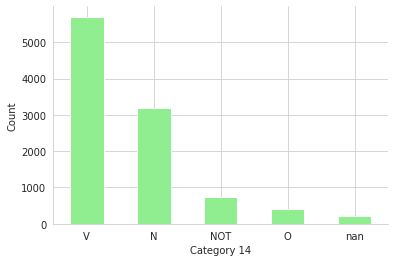

In [38]:
train_data.ft_14_categ.value_counts(dropna=False).plot(kind='bar',color='lightgreen',rot=0)
plt.xlabel('Category 14')
plt.ylabel('Count')
sns.despine()

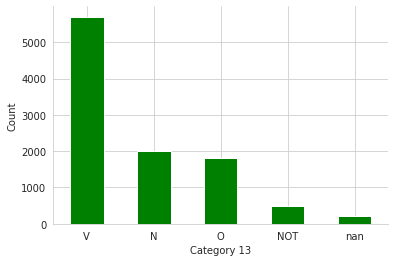

In [39]:
train_data.ft_13_categ.value_counts(dropna=False).plot(kind='bar',color='green',rot=0)
plt.xlabel('Category 13')
plt.ylabel('Count')
sns.despine()


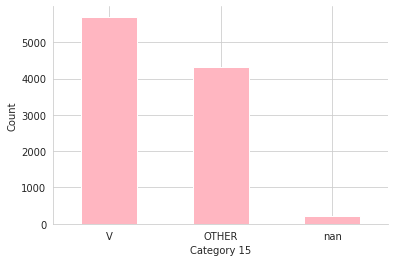

In [40]:
train_data.ft_15_categ.replace('AUTRE','OTHER',inplace=True)
train_data.ft_15_categ
train_data.ft_15_categ.value_counts(dropna=False).plot(kind='bar',color='lightpink',rot=0)
plt.xlabel('Category 15')
plt.ylabel('Count')
sns.despine()
plt.show()

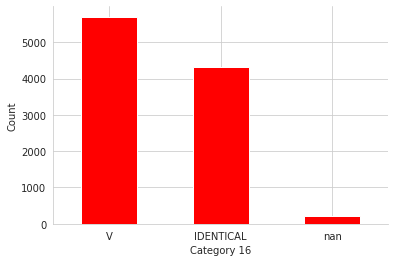

In [41]:
train_data.ft_16_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_16_categ.value_counts(dropna=False).plot(kind='bar',color='red',rot=0)
plt.xlabel('Category 16')
plt.ylabel('Count')
sns.despine()

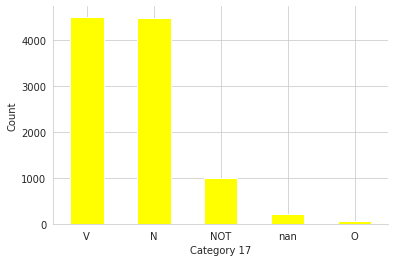

In [42]:
train_data.ft_17_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_17_categ.value_counts(dropna=False).plot(kind='bar',color='yellow',rot=0)
plt.xlabel('Category 17')
plt.ylabel('Count')
sns.despine()

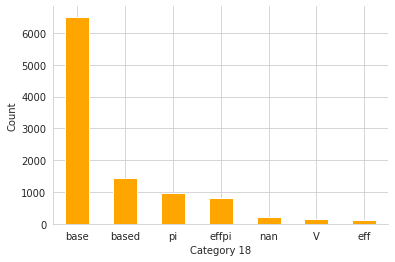

In [43]:
train_data.ft_18_categ.replace('IDENTIQUE','IDENTICAL',inplace=True)
train_data.ft_18_categ.value_counts(dropna=False).plot(kind='bar',color='orange',rot=0)
plt.xlabel('Category 18')
plt.ylabel('Count')
sns.despine()

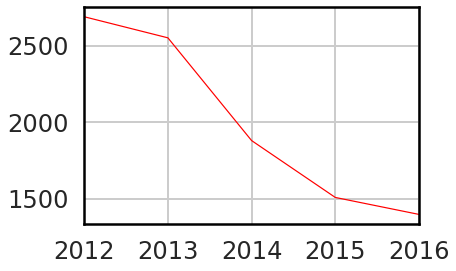

In [44]:
sns.set_style("whitegrid", {'axes.edgecolor': '0'})
sns.set_context("poster", font_scale=1.1)
train_data.ft_2_categ.value_counts().plot(kind='line', linewidth=1.2, color='red')


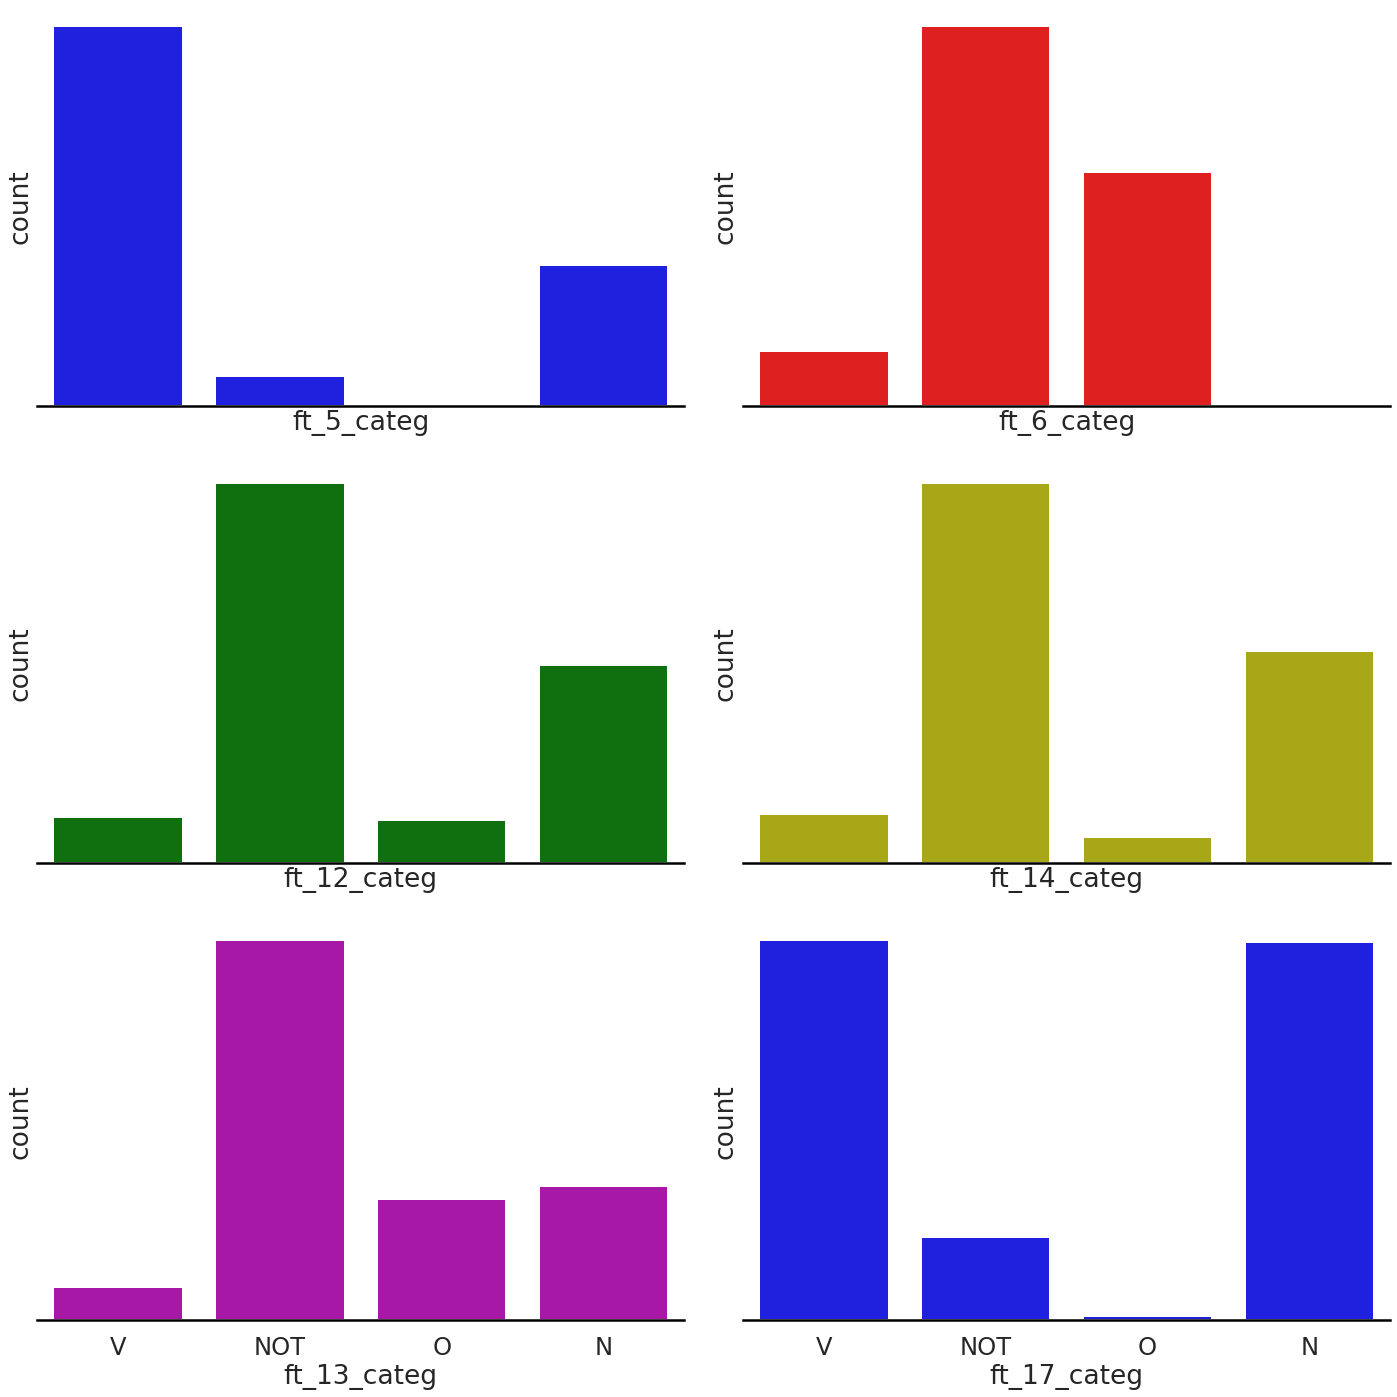

In [45]:
f,a=plt.subplots(3,2,figsize=(20,20),sharex=True)
sns.despine(left=True)
sns.countplot(x="ft_5_categ",data=train_data,color="b",ax=a[0,0])
sns.countplot(x="ft_6_categ",data=train_data,color="r",ax=a[0,1])
sns.countplot(x="ft_12_categ",data=train_data,color="g",ax=a[1,0])
sns.countplot(x="ft_14_categ",data=train_data,color="y",ax=a[1,1])
sns.countplot(x="ft_13_categ",data=train_data,color="m",ax=a[2,0])
sns.countplot(x="ft_17_categ",data=train_data,color="b",ax=a[2,1])
plt.setp(a,yticks=[])
plt.tight_layout()

In [46]:
# Removing attribute login as it does not support in the prediction
train_data.drop('login',axis=1,inplace=True)
test_data.drop('login',axis=1,inplace=True)
train_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee,TARGET
0,2014.0,1.000000,0.0,V,NOT,1,O,1,O,NOT,...,V,based,2.0,1351.0,4.0,2012.0,0,2,65440,0.0
1,2014.0,1.000000,0.0,V,V,V,V,V,V,V,...,NOT,based,2.0,1972.0,2.0,1980.0,0,0,14341,1.0
2,2013.0,1.000000,1.0,V,V,V,V,V,V,V,...,NOT,based,2.0,1630.0,4.0,NaN,0,0,75109,0.0
3,2013.0,0.246575,0.0,NOT,V,V,V,V,V,V,...,NOT,based,2.0,532.0,3.0,NaN,0,0,92004,0.0
4,2015.0,1.000000,0.0,V,NOT,2,O,1,O,NOT,...,V,based,2.0,1050.0,2.0,1972.0,0,4,59340,0.0


In [47]:
test_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,2012,1.000000,1,V,NOT,1,O,1,O,NOT,...,IDENTICAL,V,effpi,2,2682.0,2,1970.0,0,4,78383
1,2012,1.000000,1,V,NOT,1,O,1,O,NOT,...,IDENTICAL,V,based,2,2925.0,2,1960.0,0,6,78242
2,2014,1.000000,1,V,V,V,V,V,V,V,...,V,NOT,based,2,525.0,4,1960.0,0,0,75120
3,2013,0.161644,0,NOT,V,V,V,V,V,V,...,V,NOT,based,2,443.0,2,1980.0,0,0,11901
4,2013,1.000000,0,NOT,V,V,V,V,V,V,...,V,NOT,based,2,1070.0,1,NaN,0,0,42330


In [48]:
nan_data1=train_data.isnull().sum()
nan_data1

ft_2_categ      207
EXPO            207
ft_4_categ      207
ft_5_categ      207
ft_6_categ      207
ft_7_categ      207
ft_8_categ      207
ft_9_categ      207
ft_10_categ     207
ft_11_categ     207
ft_12_categ     207
ft_13_categ     207
ft_14_categ     207
ft_15_categ     207
ft_16_categ     207
ft_17_categ     207
ft_18_categ     207
ft_19_categ     207
superficief     318
ft_21_categ     207
ft_22_categ    1421
ft_23_categ     207
ft_24_categ     207
Insee           314
TARGET          207
dtype: int64

In [49]:
train_data['superficief']=train_data['superficief'].interpolate(method='linear',limit_direction='forward')

In [50]:
train_data['Insee']=train_data.Insee.fillna(method='bfill').fillna(0)

In [51]:
train_data['ft_22_categ']=train_data['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [52]:
train_data['ft_23_categ']=train_data.ft_23_categ.replace('V',np.nan)

In [53]:
train_data['ft_23_categ']=train_data['ft_23_categ'].astype('float')

In [54]:
train_data['ft_23_categ'].describe()

count    9915.000000
mean        0.067474
std         0.191777
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: ft_23_categ, dtype: float64

In [55]:
train_data['ft_23_categ']=train_data['ft_23_categ'].interpolate(method='linear',limit_direction='forward')

In [56]:
train_data['ft_24_categ']=train_data.ft_24_categ.replace('> = 10',10)
train_data['ft_24_categ']=train_data.ft_24_categ.replace('>=10',10)
train_data['ft_24_categ']=train_data['ft_24_categ'].astype('float')
train_data['ft_24_categ']=train_data['ft_24_categ'].interpolate(method='linear',limit_direction='forward')

In [57]:
train_data['ft_7_categ']=train_data.ft_7_categ.replace('V',np.nan)
train_data['ft_7_categ']=train_data['ft_7_categ'].astype('float')
train_data['ft_7_categ']=train_data['ft_7_categ'].interpolate(method='linear',limit_direction='forward')

In [58]:
train_data['ft_9_categ']=train_data.ft_9_categ.replace('V',np.nan)
train_data['ft_9_categ']=train_data['ft_9_categ'].astype('float')
train_data['ft_9_categ']=train_data['ft_9_categ'].interpolate(method='linear',limit_direction='forward')

In [59]:
train_data['ft_2_categ']=train_data['ft_2_categ'].interpolate(method='linear',limit_direction='forward')

In [60]:
train_data['EXPO']=train_data['EXPO'].interpolate(method='linear',limit_direction='forward')

In [61]:
train_data['ft_4_categ']=train_data['ft_4_categ'].interpolate(method='linear',limit_direction='forward')

In [62]:
train_data['ft_5_categ']=train_data['ft_5_categ'].interpolate(method='linear',limit_direction='forward')

In [63]:
train_data['ft_6_categ']=train_data['ft_6_categ'].interpolate(method='linear',limit_direction='forward')

In [64]:
train_data['ft_8_categ']=train_data['ft_8_categ'].interpolate(method='linear',limit_direction='forward')

In [65]:
train_data['ft_10_categ']=train_data['ft_10_categ'].interpolate(method='linear',limit_direction='forward')

In [66]:
train_data['ft_11_categ']=train_data['ft_11_categ'].interpolate(method='linear',limit_direction='forward')

In [67]:
train_data['ft_12_categ']=train_data['ft_12_categ'].interpolate(method='linear',limit_direction='forward')

In [68]:
train_data['ft_13_categ']=train_data['ft_13_categ'].interpolate(method='linear',limit_direction='forward')

In [69]:
train_data['ft_14_categ']=train_data['ft_14_categ'].interpolate(method='linear',limit_direction='forward')

In [70]:
train_data['ft_15_categ']=train_data['ft_15_categ'].interpolate(method='linear',limit_direction='forward')

In [71]:
train_data['ft_16_categ']=train_data['ft_16_categ'].interpolate(method='linear',limit_direction='forward')

In [72]:
train_data['ft_17_categ']=train_data['ft_17_categ'].interpolate(method='linear',limit_direction='forward')

In [73]:
train_data['ft_18_categ']=train_data['ft_18_categ'].interpolate(method='linear',limit_direction='forward')

In [74]:
train_data['ft_19_categ']=train_data['ft_19_categ'].interpolate(method='linear',limit_direction='forward')

In [75]:
train_data['ft_21_categ']=train_data['ft_21_categ'].interpolate(method='linear',limit_direction='forward')

In [76]:
train_data['TARGET']=train_data['TARGET'].interpolate(method='linear',limit_direction='forward')

In [77]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,10229.0,2013.636524,1.372438,2012.0,2012.0,2013.0,2015.000000,2016.0
EXPO,10229.0,0.915155,0.230248,0.0,1.0,1.0,1.000000,1.0
ft_4_categ,10229.0,0.280428,0.447198,0.0,0.0,0.0,1.000000,1.0
ft_7_categ,10229.0,1.379069,0.543525,1.0,1.0,1.0,1.714286,3.0
ft_9_categ,10229.0,1.001369,0.037410,1.0,1.0,1.0,1.000000,3.0
ft_19_categ,10229.0,1.939828,0.236644,1.0,2.0,2.0,2.000000,2.0
superficief,10229.0,1775.074983,2034.474213,100.0,520.0,1025.0,2190.000000,15000.0
ft_21_categ,10229.0,2.238342,0.956217,1.0,2.0,2.0,3.000000,4.0
ft_22_categ,10229.0,1966.399355,26.809675,1850.0,1960.0,1970.0,1980.000000,2012.0
ft_23_categ,10229.0,0.067920,0.190618,0.0,0.0,0.0,0.000000,2.0


In [78]:
target=train_data['TARGET']
train_data.drop('TARGET',axis=1,inplace=True)

In [79]:
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:5] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

# One Hot Encoding
print("One Hot Encoding categorical data...")
columns_to_convert = [ 'ft_5_categ','ft_6_categ', 'ft_8_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ','ft_15_categ','ft_16_categ','ft_17_categ','ft_18_categ']

for column in columns_to_convert:
    train_data= convert_to_binary(df=train_data, column_to_convert=column)
    train_data.drop(column, axis=1, inplace=True)
print("One Hot Encoding categorical data...complete")

One Hot Encoding categorical data...
One Hot Encoding categorical data...complete


In [80]:
train_data['TARGET']=target
train_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_7_categ,ft_9_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,...,ft_17_o,ft_17_n,ft_18_based,ft_18_effpi,ft_18_v,ft_18_pi,ft_18_eff,ft_18_nan,ft_18_base,TARGET
0,2014.0,1.000000,0.0,1.00,1.0,2.0,1351.0,4.0,2012.000000,0.0,...,0,0,1,0,0,0,0,0,0,0.0
1,2014.0,1.000000,0.0,1.25,1.0,2.0,1972.0,2.0,1980.000000,0.0,...,0,0,1,0,0,0,0,0,0,1.0
2,2013.0,1.000000,1.0,1.50,1.0,2.0,1630.0,4.0,1977.333333,0.0,...,0,0,1,0,0,0,0,0,0,0.0
3,2013.0,0.246575,0.0,1.75,1.0,2.0,532.0,3.0,1974.666667,0.0,...,0,0,1,0,0,0,0,0,0,0.0
4,2015.0,1.000000,0.0,2.00,1.0,2.0,1050.0,2.0,1972.000000,0.0,...,0,0,1,0,0,0,0,0,0,0.0


In [81]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,10229.0,2013.636524,1.372438,2012.0,2012.0,2013.0,2015.000000,2016.0
EXPO,10229.0,0.915155,0.230248,0.0,1.0,1.0,1.000000,1.0
ft_4_categ,10229.0,0.280428,0.447198,0.0,0.0,0.0,1.000000,1.0
ft_7_categ,10229.0,1.379069,0.543525,1.0,1.0,1.0,1.714286,3.0
ft_9_categ,10229.0,1.001369,0.037410,1.0,1.0,1.0,1.000000,3.0
...,...,...,...,...,...,...,...,...
ft_18_pi,10229.0,0.096197,0.294876,0.0,0.0,0.0,0.000000,1.0
ft_18_eff,10229.0,0.010949,0.104069,0.0,0.0,0.0,0.000000,1.0
ft_18_nan,10229.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
ft_18_base,10229.0,0.636621,0.480996,0.0,0.0,1.0,1.000000,1.0


In [82]:
train_data.ft_2_categ=minmax_scaling(train_data['ft_2_categ'],columns=0)

In [83]:
train_data.EXPO=minmax_scaling(train_data['EXPO'],columns=0)

In [84]:
train_data.ft_4_categ=minmax_scaling(train_data['ft_4_categ'],columns=0)

In [85]:
train_data.ft_7_categ=minmax_scaling(train_data['ft_7_categ'],columns=0)

In [86]:
train_data.ft_9_categ=minmax_scaling(train_data['ft_9_categ'],columns=0)

In [87]:
train_data.ft_19_categ=minmax_scaling(train_data['ft_19_categ'],columns=0)

In [88]:
train_data.superficief=minmax_scaling(train_data['superficief'],columns=0)

In [89]:
train_data.ft_21_categ=minmax_scaling(train_data['ft_21_categ'],columns=0)

In [90]:
train_data.ft_22_categ=minmax_scaling(train_data['ft_22_categ'],columns=0)

In [91]:
train_data.ft_23_categ=minmax_scaling(train_data['ft_23_categ'],columns=0)

In [92]:
train_data.ft_24_categ=minmax_scaling(train_data['ft_24_categ'],columns=0)

In [93]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,10229.0,0.409131,0.343109,0.0,0.0,0.25,0.750000,1.0
EXPO,10229.0,0.915155,0.230248,0.0,1.0,1.00,1.000000,1.0
ft_4_categ,10229.0,0.280428,0.447198,0.0,0.0,0.00,1.000000,1.0
ft_7_categ,10229.0,0.189535,0.271763,0.0,0.0,0.00,0.357143,1.0
ft_9_categ,10229.0,0.000684,0.018705,0.0,0.0,0.00,0.000000,1.0
...,...,...,...,...,...,...,...,...
ft_18_pi,10229.0,0.096197,0.294876,0.0,0.0,0.00,0.000000,1.0
ft_18_eff,10229.0,0.010949,0.104069,0.0,0.0,0.00,0.000000,1.0
ft_18_nan,10229.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0
ft_18_base,10229.0,0.636621,0.480996,0.0,0.0,1.00,1.000000,1.0


In [94]:
train_data.drop('Insee',axis=1,inplace=True)

In [95]:
train_data.drop(['ft_5__nan','ft_6__nan','ft_8__nan','ft_10_nan','ft_11_nan','ft_12_nan','ft_13_nan','ft_14_nan','ft_15_nan','ft_16_nan','ft_17_nan','ft_18_nan'],axis=1,inplace=True)

In [96]:
train_data.shape[1]

57

In [97]:
train_data.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_7_categ', 'ft_9_categ',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'ft_5__v', 'ft_5__not', 'ft_5__o',
       'ft_5__n', 'ft_6__not', 'ft_6__v', 'ft_6__n', 'ft_6__o', 'ft_8__o',
       'ft_8__v', 'ft_8__n', 'ft_10_o', 'ft_10_v', 'ft_10_not', 'ft_10_n',
       'ft_11_not', 'ft_11_v', 'ft_11_o', 'ft_11_n', 'ft_12_not', 'ft_12_v',
       'ft_12_o', 'ft_12_n', 'ft_13_not', 'ft_13_v', 'ft_13_o', 'ft_13_n',
       'ft_14_not', 'ft_14_v', 'ft_14_o', 'ft_14_n', 'ft_15_other', 'ft_15_v',
       'ft_16_identical', 'ft_16_v', 'ft_17_v', 'ft_17_not', 'ft_17_o',
       'ft_17_n', 'ft_18_based', 'ft_18_effpi', 'ft_18_v', 'ft_18_pi',
       'ft_18_eff', 'ft_18_base', 'TARGET'],
      dtype='object')

In [98]:
test_data.head()

,ft_2_categ,EXPO,ft_4_categ,ft_5_categ,ft_6_categ,ft_7_categ,ft_8_categ,ft_9_categ,ft_10_categ,ft_11_categ,...,ft_16_categ,ft_17_categ,ft_18_categ,ft_19_categ,superficief,ft_21_categ,ft_22_categ,ft_23_categ,ft_24_categ,Insee
0,2012,1.000000,1,V,NOT,1,O,1,O,NOT,...,IDENTICAL,V,effpi,2,2682.0,2,1970.0,0,4,78383
1,2012,1.000000,1,V,NOT,1,O,1,O,NOT,...,IDENTICAL,V,based,2,2925.0,2,1960.0,0,6,78242
2,2014,1.000000,1,V,V,V,V,V,V,V,...,V,NOT,based,2,525.0,4,1960.0,0,0,75120
3,2013,0.161644,0,NOT,V,V,V,V,V,V,...,V,NOT,based,2,443.0,2,1980.0,0,0,11901
4,2013,1.000000,0,NOT,V,V,V,V,V,V,...,V,NOT,based,2,1070.0,1,NaN,0,0,42330


In [99]:
def convert_to_binary(df, column_to_convert):
    categories = list(df[column_to_convert].drop_duplicates())

    for category in categories:
        cat_name = str(category).replace(" ", "_").replace("(", "").replace(")", "").replace("/", "_").replace("-", "").lower()
        col_name = column_to_convert[:5] + '_' + cat_name[:10]
        df[col_name] = 0
        df.loc[(df[column_to_convert] == category), col_name] = 1

    return df

# One Hot Encoding
print("One Hot Encoding categorical data...")
columns_to_convert = [ 'ft_5_categ','ft_6_categ', 'ft_8_categ', 'ft_10_categ', 'ft_11_categ', 'ft_12_categ', 'ft_13_categ', 'ft_14_categ','ft_15_categ','ft_16_categ','ft_17_categ','ft_18_categ']

for column in columns_to_convert:
    test_data = convert_to_binary(df=test_data, column_to_convert=column)
    test_data.drop(column, axis=1, inplace=True)
print("One Hot Encoding categorical data...complete")

One Hot Encoding categorical data...
One Hot Encoding categorical data...complete


In [100]:
nan_data2=test_data.isnull().sum()
nan_data2

ft_2_categ           0
EXPO                 0
ft_4_categ           0
ft_7_categ           0
ft_9_categ           0
ft_19_categ          0
superficief         42
ft_21_categ          0
ft_22_categ        402
ft_23_categ          0
ft_24_categ          0
Insee               39
ft_5__v              0
ft_5__not            0
ft_5__o              0
ft_6__not            0
ft_6__v              0
ft_6__o              0
ft_8__o              0
ft_8__v              0
ft_8__not            0
ft_10_o              0
ft_10_v              0
ft_10_not            0
ft_11_not            0
ft_11_v              0
ft_11_o              0
ft_12_not            0
ft_12_v              0
ft_12_o              0
ft_13_o              0
ft_13_v              0
ft_13_not            0
ft_14_not            0
ft_14_v              0
ft_14_o              0
ft_15_other          0
ft_15_v              0
ft_16_identical      0
ft_16_v              0
ft_17_v              0
ft_17_not            0
ft_17_o              0
ft_18_effpi

In [101]:
test_data['superficief']=test_data['superficief'].interpolate(method='linear',limit_direction='forward')

In [102]:
test_data['ft_22_categ']=test_data['ft_22_categ'].interpolate(method='linear',limit_direction='forward')

In [103]:
test_data['ft_23_categ']=test_data.ft_23_categ.replace('V',np.nan)
test_data['ft_23_categ']=test_data['ft_23_categ'].astype('float')
test_data['ft_23_categ'].describe()

count    3373.000000
mean        0.068574
std         0.185897
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: ft_23_categ, dtype: float64

In [104]:
test_data['ft_23_categ']=test_data['ft_23_categ'].interpolate(method='linear',limit_direction='forward')

In [105]:
test_data['ft_24_categ']=test_data.ft_24_categ.replace('> = 10',10)
test_data['ft_24_categ']=test_data.ft_24_categ.replace('>=10',10)
test_data['ft_24_categ']=test_data['ft_24_categ'].astype('float')
test_data['ft_24_categ']=test_data['ft_24_categ'].interpolate(method='linear',limit_direction='forward')

In [106]:
test_data['ft_7_categ']=test_data.ft_7_categ.replace('V',np.nan)
test_data['ft_7_categ']=test_data['ft_7_categ'].astype('float')
test_data['ft_7_categ']=test_data['ft_7_categ'].interpolate(method='linear',limit_direction='forward')

In [107]:
test_data['ft_9_categ']=test_data.ft_9_categ.replace('V',np.nan)
test_data['ft_9_categ']=test_data['ft_9_categ'].astype('float')
test_data['ft_9_categ']=test_data['ft_9_categ'].interpolate(method='linear',limit_direction='forward')

In [108]:
test_data.drop('Insee',axis=1,inplace=True)

In [109]:
test_data.ft_2_categ=minmax_scaling(test_data['ft_2_categ'],columns=0)

In [110]:
test_data['EXPO']=minmax_scaling(test_data['EXPO'],columns=0)

In [111]:
test_data.ft_4_categ=minmax_scaling(test_data['ft_4_categ'],columns=0)

In [112]:
test_data.ft_19_categ=minmax_scaling(test_data['ft_19_categ'],columns=0)

In [113]:
test_data['superficief']=minmax_scaling(test_data['superficief'],columns=0)

In [114]:
test_data.ft_21_categ=minmax_scaling(test_data['ft_21_categ'],columns=0)

In [115]:
test_data.ft_22_categ=minmax_scaling(test_data['ft_22_categ'],columns=0)

In [116]:
test_data.ft_7_categ=minmax_scaling(test_data['ft_7_categ'],columns=0)

In [117]:
test_data.ft_9_categ=minmax_scaling(test_data['ft_9_categ'],columns=0)

In [118]:
test_data.ft_24_categ=minmax_scaling(test_data['ft_24_categ'],columns=0)

In [119]:
test_data.ft_23_categ=minmax_scaling(test_data['ft_23_categ'],columns=0)

In [120]:
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ft_2_categ,3412.0,0.402696,0.346992,0.0,0.000000,0.250000,0.750000,1.0
EXPO,3412.0,0.911044,0.236351,0.0,1.000000,1.000000,1.000000,1.0
ft_4_categ,3412.0,0.270223,0.444140,0.0,0.000000,0.000000,1.000000,1.0
ft_7_categ,3412.0,0.174311,0.267292,0.0,0.000000,0.000000,0.333333,1.0
ft_9_categ,3412.0,0.001246,0.025554,0.0,0.000000,0.000000,0.000000,1.0
ft_19_categ,3412.0,0.940797,0.236038,0.0,1.000000,1.000000,1.000000,1.0
superficief,3412.0,0.051383,0.063580,0.0,0.014205,0.028641,0.063287,1.0
ft_21_categ,3412.0,0.416471,0.327305,0.0,0.333333,0.333333,0.666667,1.0
ft_22_categ,3412.0,0.899981,0.067929,0.0,0.891473,0.909399,0.930233,1.0
ft_23_categ,3412.0,0.034386,0.092699,0.0,0.000000,0.000000,0.000000,1.0


In [121]:
test_data.columns

Index(['ft_2_categ', 'EXPO', 'ft_4_categ', 'ft_7_categ', 'ft_9_categ',
       'ft_19_categ', 'superficief', 'ft_21_categ', 'ft_22_categ',
       'ft_23_categ', 'ft_24_categ', 'ft_5__v', 'ft_5__not', 'ft_5__o',
       'ft_6__not', 'ft_6__v', 'ft_6__o', 'ft_8__o', 'ft_8__v', 'ft_8__not',
       'ft_10_o', 'ft_10_v', 'ft_10_not', 'ft_11_not', 'ft_11_v', 'ft_11_o',
       'ft_12_not', 'ft_12_v', 'ft_12_o', 'ft_13_o', 'ft_13_v', 'ft_13_not',
       'ft_14_not', 'ft_14_v', 'ft_14_o', 'ft_15_other', 'ft_15_v',
       'ft_16_identical', 'ft_16_v', 'ft_17_v', 'ft_17_not', 'ft_17_o',
       'ft_18_effpi', 'ft_18_based', 'ft_18_eff', 'ft_18_pi', 'ft_18_v'],
      dtype='object')

In [122]:
arr=train_data.values
X=arr[:,0:56]
Y=arr[:,56]

In [123]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [124]:
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

ValueError: Unknown label type: 'continuous'